# Question 1
- Learn & Understand Zip's Law.

# Requirments 
- Use Glob to read file and loop.
- Create one Lambda and one function.
- Save Data in CSV file contains (Word, Frequency, Rank) sorted by Rank
- Read CSV generated and create log-log figure.
- Use matplotlib to generate figure.
- Save figure in png file.
- Write Conclusion at end.

###### Using Gutenber Corpora from nltk_data store in C Drive

###### Proving if Zip's Law work in NLTK package or not.

In [3]:
# Importing All the libraries that I am going to use.

import glob # use to read file in directory.
import re # use to clean data.
import csv # use to create CSV file.
import matplotlib.pyplot as plt # use to create plot graph.
import os

In [7]:
# using glob to read all nltk gutenberg in C Drive.
files = glob.glob("C://Users//rohit//AppData//Roaming//nltk_data/corpora/gutenberg/*.txt")
relativePath = os.getcwd() #get relative path
# Looping in order to merge all text file present in gutenberg corpora and storing in D drive.
# After merging the file size of guternberg.txt is more than 10 MB.

with open( relativePath+"/"+'gutenberg.txt', 'w' ) as result:
    for file in files:
        for line in open( file, 'r' ):
            result.write(line)

In [8]:
# opening merge file name gutenberg.txt using open function.
file = open(relativePath+"/"+'gutenberg.txt', 'r')
l = []

# Reading line by line from file.
contents = file.readlines()

# looping in order to insert all words in list name 'l'.
for line in range(len(contents)):
    l.extend(re.findall(r"[\w']+", contents[line]))
    

# Defining Parameterized function name Clean and passing one element.    
def clean(elem):
    return  re.sub('[^a-zA-Z0-9 \n\.]', '', elem)


# looping list name l and cleaning every word and storing in new list name newList.
newList = []
for c in range(len(l)):
    removed = clean(l[c])
    newList.append(removed)

In [9]:
# creating empty dictionary.
frequency={}

#Looping through new List and getting the count of every word and storing in Dictionary.
for word in newList:
    count = frequency.get(word,0)
    frequency[word] = count + 1
    
# Defining Lambda function to sort in descending order.
sortedDict = sorted(frequency.items(), key=lambda x: (-x[1], x[0])) # sorted is used to sort dictionary in descending order.
print(sortedDict[:10])

[('the', 125749), ('and', 78846), ('of', 70080), ('to', 46443), ('a', 32489), ('in', 31941), ('I', 29128), ('that', 27057), ('he', 21967), ('his', 20594)]


In [10]:
# Now the task is to assign Rank to each word.
i = 1
rankList = []

# Looping in order to assign rank to each word.
for rank in range(len(sortedDict)):
    obj1 = sortedDict[rank]
    obj1 = obj1 + (i,)
    rankList.append(obj1)
    i = i+1

print(rankList[:10])

[('the', 125749, 1), ('and', 78846, 2), ('of', 70080, 3), ('to', 46443, 4), ('a', 32489, 5), ('in', 31941, 6), ('I', 29128, 7), ('that', 27057, 8), ('he', 21967, 9), ('his', 20594, 10)]


In [11]:
# creating CSV file that contains (Word, Frequency, Rank) sorted by Rank.
fileName = relativePath+"/"+'gutenbergCorpus.csv'

# Writing the data in to CSV file and storing in D drive.
with open(fileName, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Word", "Frequency", "Rank"])
    a.writerows(rankList)

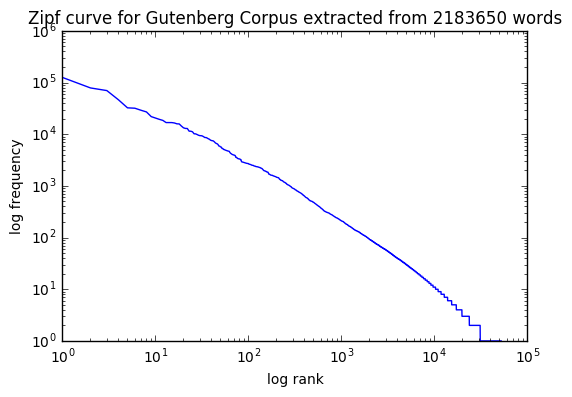

In [12]:
# Now plotting loglog figure.
exportFig = relativePath+"/"+'zipfGraph.png'
x = []
y = []


# Reading CSV file in order to generate loglog figure.
with open(fileName,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[2]))
        y.append(int(row[1]))

plt.loglog(x,y, label='Freq vs Rank')
plt.xlabel('log rank')
plt.ylabel('log frequency')
plt.title('Zipf curve for Gutenberg Corpus extracted from 2183650 words')
plt.legend

# storing figure in png file and stored in D drive.
plt.savefig(exportFig, bbox_inches='tight')
plt.show()

# Conclusion.
- The simplest way to show that Zipf's law holds is to plot the data. 
- Remember that looking at most frequent and least frequent words only is misleading. 
- For those types of words Zipf's law has the highest errors
- Zipf law make most errors for Highest Frequency nad lowest frequency words.
- It states it's better to plot Rank on X aixs and Frequency on Y axis.
- If Zipf law hold we will see a line with slope -1.
- It means this means if A is the point where the line crosses the x-axis 
  and B is the point where the line crosses the y-axis 
  and O is the origin of the coordinate system then OA = OB

- After understanding Zipf law and plotting data on log graph,
  "We can say NLTK Data for gutenberg corpora hold ZIPF's Law."